# Shapelet classification

In [2]:
from sktime.transformations.panel.shapelet_transform import RandomShapeletTransform
from utils import  amplitude_scaling, load_dataset, save_distance_matrix
import numpy as np
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## SAX-32

In [3]:
X_train, y_train, X_test, y_test = load_dataset('../dataset_ts/ts_data_sax32.npz')

In [4]:
# amplitude scaling (usa anche la minmax perchè poi quando cerco le shapelet si genera un eccezione "division by zero")
X_train_scaled,y_train_scaled = amplitude_scaling(X_train,y_train)
X_test_scaled,y_test_scaled = amplitude_scaling(X_test,y_test)


X_train_sax_scaled = np.expand_dims(X_train_scaled, axis=2)
X_test_sax_scaled= np.expand_dims(X_test_scaled, axis=2)

In [9]:
"""
scaler = TabularToSeriesAdaptor(MinMaxScaler(), fit_in_transform=True)
X_train_sax_scaled_norm = scaler.fit_transform(X_train_sax_scaled_r)
X_test_sax_scaled_norm = scaler.transform(X_test_sax_scaled_r)
"""

In [28]:
#rst = RandomShapeletTransform(n_shapelet_samples=500, max_shapelets=60, min_shapelet_length=4, max_shapelet_length=16, n_jobs=-1, random_state=8)

In [29]:

#rst.fit(X_train_sax_scaled_norm, y_train_sax)

RandomShapeletTransform(max_shapelet_length=16, max_shapelets=60,
                        min_shapelet_length=4, n_jobs=-1,
                        n_shapelet_samples=500, random_state=8)

In [30]:
#shapelets_distances_train = rst.transform(X_train_sax_scaled_norm)
#shapelets_distances_test = rst.transform(X_test_sax_scaled_norm)

In [31]:
"""
parameters = {'criterion': ['gini', 'entropy','log_loss'],
              'min_samples_split': [32,64,128,200,300,400,500,600,700],
              'min_samples_leaf': [1,2,4,6,8,10,14,18,24,30,40,50,60,75,100],
              }
dtc = DecisionTreeClassifier(random_state=8)
clf = GridSearchCV(
    dtc, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    verbose=2
    )
clf.fit(shapelets_distances_train, y_train_sax_scaled)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)
"""

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
DecisionTreeClassifier(min_samples_leaf=30, min_samples_split=300,
                       random_state=8)
{'criterion': 'gini', 'min_samples_leaf': 30, 'min_samples_split': 300}
0.09533333333333334


In [5]:
from tslearn.shapelets import LearningShapelets, grabocka_params_to_shapelet_size_dict
import tensorflow as tf

In [6]:
X_val = X_train_scaled[6000:]
X_train = X_train_scaled[:6000]

In [65]:
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=6000,
                                                       ts_sz=32,
                                                       n_classes=20,
                                                       l=0.15,
                                                       r=8)

In [7]:
shp_clf = LearningShapelets(n_shapelets_per_size={4:30,6:30,8:30,10:30,12:30,14:30,16:30},
                            optimizer=tf.optimizers.Adam(learning_rate=0.001),
                            batch_size=15,
                            weight_regularizer=0.001,
                            max_iter=300,
                            random_state=8,
                            verbose=1,
                            scale=True)

In [8]:
shp_clf.fit(X_train_scaled, y_train_scaled)

Epoch 1/300
500/500 [==============================] - 4s 3ms/step - loss: 3.0156 - categorical_accuracy: 0.0613 - categorical_crossentropy: 2.9880
Epoch 2/300
500/500 [==============================] - 1s 3ms/step - loss: 2.9831 - categorical_accuracy: 0.0828 - categorical_crossentropy: 2.9634
Epoch 3/300
500/500 [==============================] - 1s 3ms/step - loss: 2.9544 - categorical_accuracy: 0.0916 - categorical_crossentropy: 2.9344
Epoch 4/300
500/500 [==============================] - 1s 3ms/step - loss: 2.9351 - categorical_accuracy: 0.1023 - categorical_crossentropy: 2.9124
Epoch 5/300
500/500 [==============================] - 1s 3ms/step - loss: 2.9226 - categorical_accuracy: 0.1029 - categorical_crossentropy: 2.8979
Epoch 6/300
500/500 [==============================] - 1s 3ms/step - loss: 2.9138 - categorical_accuracy: 0.1056 - categorical_crossentropy: 2.8873
Epoch 7/300
500/500 [==============================] - 1s 3ms/step - loss: 2.9095 - categorical_accuracy: 0.1076

LearningShapelets(batch_size=15, max_iter=300,
                  n_shapelets_per_size={4: 30, 6: 30, 8: 30, 10: 30, 12: 30,
                                        14: 30, 16: 30},
                  optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x00000207AC1D39A0>,
                  random_state=8, scale=True, verbose=1,
                  weight_regularizer=0.001)

In [9]:
pred_labels = shp_clf.predict(X_val)
print(classification_report(y_train_scaled[6000:], pred_labels))

100/100 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.11      0.06      0.08        69
           1       0.17      0.14      0.15        66
           2       0.00      0.00      0.00        83
           3       0.24      0.60      0.34        78
           4       0.00      0.00      0.00        75
           5       0.43      0.04      0.07        74
           6       0.00      0.00      0.00        94
           7       0.17      0.05      0.08        61
           8       0.29      0.38      0.33        69
           9       0.14      0.01      0.02        83
          10       0.19      0.36      0.25        78
          11       0.20      0.03      0.05        75
          12       0.33      0.01      0.03        72
          13       0.17      0.33      0.22        72
          14       0.33      0.01      0.03        74
          15       0.11      0.71      0.19        91
          16       0.13   

c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [110]:
spts = shp_clf.shapelets_as_time_series_
spts.shape

(210, 16, 1)

In [10]:
X_train_dist = shp_clf.transform(X_train)
X_val_dist = shp_clf.transform(X_val)

100/100 [==============================] - 0s 1ms/step


In [11]:
from sklearn.naive_bayes import GaussianNB
md = GaussianNB()
md.fit(X_train_dist, y_train_scaled[:6000])
y_pred = md.predict(X_val_dist)
print(classification_report(y_train_scaled[6000:], y_pred))

              precision    recall  f1-score   support

           0       0.15      0.07      0.10        69
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        83
           3       0.29      0.28      0.29        78
           4       0.08      0.11      0.09        75
           5       0.15      0.16      0.15        74
           6       0.12      0.22      0.15        94
           7       0.17      0.10      0.12        61
           8       0.32      0.39      0.35        69
           9       0.11      0.05      0.07        83
          10       0.18      0.36      0.24        78
          11       0.06      0.08      0.07        75
          12       0.29      0.03      0.05        72
          13       0.17      0.26      0.21        72
          14       0.11      0.20      0.14        74
          15       0.13      0.32      0.19        91
          16       0.11      0.04      0.06        67
          17       0.00    

c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
parameters = {'criterion': ['entropy'],
              'min_samples_split': [32,64,128,200,300,400,500,600,700],
              'min_samples_leaf': [10,14,18,24,30,40,50,60,75,100],
              }
dtc = DecisionTreeClassifier(random_state=8)
clf = GridSearchCV(
    dtc, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    verbose=2
    )
clf.fit(np.concatenate((X_train_dist, X_val_dist), axis=0), y_train_scaled)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=60,
                       min_samples_split=600, random_state=8)
{'criterion': 'entropy', 'min_samples_leaf': 60, 'min_samples_split': 600}
0.1012


In [13]:
from sklearn.neighbors import KNeighborsClassifier
# knn
parameters = {'n_neighbors': [1,5,10,15,20,30,40,50,60,80,100,125,150,200],
              'weights': ['distance', 'uniform'],
              'metric': ['euclidean', 'cosine', 'manhattan'],
              'n_jobs': [-1]
              }
knn = KNeighborsClassifier()
clf = GridSearchCV(
    knn, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    )
clf.fit(np.concatenate((X_train_dist, X_val_dist), axis=0), y_train_scaled)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=60,
                     weights='distance')
{'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 60, 'weights': 'distance'}
0.13720000000000002


### Test:

Embedded Logistic Regression:

In [14]:
y_pred = shp_clf.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred))

167/167 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.03      0.01      0.01       127
           1       0.11      0.07      0.08       133
           2       0.00      0.00      0.00       109
           3       0.19      0.47      0.27       139
           4       0.00      0.00      0.00       131
           5       0.11      0.01      0.01       135
           6       0.00      0.00      0.00       116
           7       0.26      0.03      0.06       145
           8       0.28      0.29      0.29       136
           9       0.05      0.01      0.01       119
          10       0.15      0.26      0.19       125
          11       0.12      0.02      0.03       123
          12       0.00      0.00      0.00       143
          13       0.16      0.35      0.22       118
          14       0.00      0.00      0.00       128
          15       0.07      0.67      0.13       112
          16       0.10   

c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Naive Bayes:

In [15]:
X_train_dist_tot = shp_clf.transform(X_train_scaled)
X_test_dist = shp_clf.transform(X_test_scaled)

nb = GaussianNB()
nb.fit(X_train_dist_tot, y_train_scaled)
y_pred = nb.predict(X_test_dist)
print(classification_report(y_test_scaled, y_pred))

167/167 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.03      0.02      0.02       127
           1       0.00      0.00      0.00       133
           2       0.14      0.01      0.02       109
           3       0.18      0.24      0.21       139
           4       0.10      0.13      0.11       131
           5       0.06      0.07      0.07       135
           6       0.08      0.15      0.10       116
           7       0.16      0.09      0.12       145
           8       0.24      0.27      0.26       136
           9       0.11      0.06      0.08       119
          10       0.14      0.28      0.19       125
          11       0.08      0.13      0.10       123
          12       0.27      0.02      0.04       143
          13       0.18      0.24      0.20       118
          14       0.12      0.16      0.14       128
          15       0.09      0.32      0.14       112
          16       0.09   

Decision Tree:

In [17]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=60,
                       min_samples_split=600, random_state=8)
dt.fit(X_train_dist_tot, y_train_scaled)
y_pred = dt.predict(X_test_dist)
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.09      0.09       127
           1       0.04      0.04      0.04       133
           2       0.05      0.09      0.07       109
           3       0.11      0.14      0.12       139
           4       0.00      0.00      0.00       131
           5       0.08      0.10      0.09       135
           6       0.05      0.06      0.05       116
           7       0.17      0.08      0.11       145
           8       0.24      0.48      0.32       136
           9       0.04      0.03      0.04       119
          10       0.08      0.19      0.12       125
          11       0.00      0.00      0.00       123
          12       0.00      0.00      0.00       143
          13       0.00      0.00      0.00       118
          14       0.08      0.10      0.09       128
          15       0.05      0.09      0.07       112
          16       0.07      0.12      0.09       119
          17       0.00    

c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\giuli\anaconda3\envs\DEEPL\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN:

In [18]:
knn = KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=60,
                     weights='distance')
knn.fit(X_train_dist_tot, y_train_scaled)
y_pred = knn.predict(X_test_dist)
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.09      0.11       127
           1       0.08      0.05      0.06       133
           2       0.06      0.05      0.05       109
           3       0.27      0.29      0.28       139
           4       0.07      0.05      0.06       131
           5       0.10      0.13      0.12       135
           6       0.07      0.13      0.09       116
           7       0.13      0.08      0.10       145
           8       0.28      0.26      0.27       136
           9       0.07      0.05      0.06       119
          10       0.13      0.22      0.16       125
          11       0.07      0.05      0.06       123
          12       0.06      0.03      0.04       143
          13       0.18      0.19      0.18       118
          14       0.10      0.10      0.10       128
          15       0.07      0.16      0.10       112
          16       0.18      0.13      0.15       119
          17       0.06    

## PCA

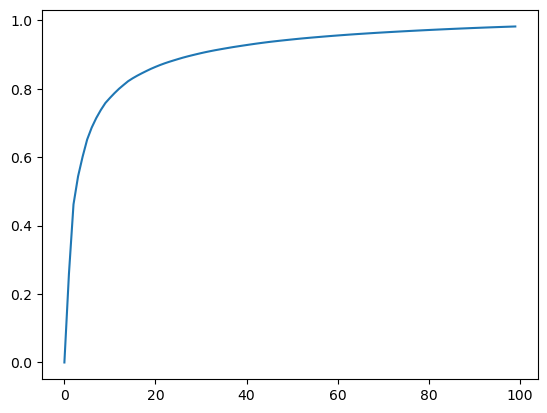

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
variance_ratio = PCA(n_components=100).fit(X_train_dist_tot).explained_variance_ratio_
cumulative = [np.sum(variance_ratio[:i]) for i in range(variance_ratio.shape[0])]
plt.plot(cumulative
         )

In [21]:
pca = PCA(n_components=20)
pca.fit(X_train_dist_tot)
X_train_dist_pca = pca.transform(X_train_dist_tot)

In [22]:
# knn
parameters = {'n_neighbors': [1,5,10,15,20,30,40,50,60,80,100,125,150,200],
              'weights': ['distance', 'uniform'],
              'metric': ['euclidean', 'cosine', 'manhattan'],
              'n_jobs': [-1]
              }
knn = KNeighborsClassifier()
clf = GridSearchCV(
    knn, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    )
clf.fit(X_train_dist_pca, y_train_scaled)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=125,
                     weights='distance')
{'metric': 'cosine', 'n_jobs': -1, 'n_neighbors': 125, 'weights': 'distance'}
0.13733333333333336


In [23]:
# decision tree
parameters = {'criterion': ['entropy'],
              'min_samples_split': [32,64,128,200,300,400,500,600,700],
              'min_samples_leaf': [10,14,18,24,30,40,50,60,75,100],
              }
dtc = DecisionTreeClassifier(random_state=8)
clf = GridSearchCV(
    dtc, 
    parameters, 
    scoring='accuracy', 
    n_jobs=-1,
    refit=True,
    verbose=2
    )
clf.fit(X_train_dist_pca, y_train_scaled)
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=128, random_state=8)
{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 128}
0.10386666666666666


In [24]:
md = GaussianNB()
md.fit(X_train_dist_pca[:6000], y_train_scaled[:6000])
y_pred = md.predict(X_train_dist_pca[6000:])
print(classification_report(y_train_scaled[6000:], y_pred))

              precision    recall  f1-score   support

           0       0.03      0.01      0.02        69
           1       0.00      0.00      0.00        66
           2       0.03      0.01      0.02        83
           3       0.31      0.36      0.34        78
           4       0.09      0.07      0.08        75
           5       0.19      0.23      0.21        74
           6       0.10      0.10      0.10        94
           7       0.16      0.18      0.17        61
           8       0.24      0.35      0.28        69
           9       0.07      0.04      0.05        83
          10       0.19      0.28      0.23        78
          11       0.04      0.04      0.04        75
          12       0.17      0.17      0.17        72
          13       0.19      0.22      0.20        72
          14       0.08      0.16      0.10        74
          15       0.13      0.24      0.17        91
          16       0.20      0.18      0.19        67
          17       0.05    

### Test:

Naive Bayes:

In [25]:
X_test_dist_pca = pca.transform(X_test_dist)

nb = GaussianNB()
nb.fit(X_train_dist_pca, y_train_scaled)
y_pred = nb.predict(X_test_dist_pca)
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.08      0.02      0.04       127
           1       0.07      0.02      0.02       133
           2       0.07      0.02      0.03       109
           3       0.25      0.29      0.26       139
           4       0.09      0.05      0.07       131
           5       0.09      0.10      0.09       135
           6       0.08      0.11      0.09       116
           7       0.15      0.12      0.13       145
           8       0.22      0.29      0.25       136
           9       0.08      0.06      0.07       119
          10       0.11      0.18      0.14       125
          11       0.10      0.11      0.10       123
          12       0.11      0.08      0.09       143
          13       0.20      0.22      0.21       118
          14       0.06      0.09      0.08       128
          15       0.07      0.22      0.11       112
          16       0.14      0.12      0.13       119
          17       0.09    

Decision Tree:

In [26]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=128, random_state=8)
dt.fit(X_train_dist_pca, y_train_scaled)
y_pred = dt.predict(X_test_dist_pca)
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.03      0.03      0.03       127
           1       0.06      0.06      0.06       133
           2       0.07      0.06      0.06       109
           3       0.15      0.15      0.15       139
           4       0.06      0.05      0.06       131
           5       0.09      0.07      0.08       135
           6       0.04      0.07      0.05       116
           7       0.08      0.04      0.05       145
           8       0.20      0.26      0.23       136
           9       0.06      0.04      0.05       119
          10       0.11      0.16      0.13       125
          11       0.05      0.07      0.06       123
          12       0.13      0.06      0.08       143
          13       0.10      0.12      0.11       118
          14       0.07      0.04      0.05       128
          15       0.07      0.09      0.08       112
          16       0.14      0.17      0.15       119
          17       0.10    

KNN:

In [28]:
knn = KNeighborsClassifier(metric='cosine', n_jobs=-1, n_neighbors=125,
                     weights='distance')
knn.fit(X_train_dist_pca, y_train_scaled)
y_pred = knn.predict(X_test_dist_pca)
print(classification_report(y_test_scaled, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.08      0.09       127
           1       0.13      0.04      0.06       133
           2       0.08      0.04      0.05       109
           3       0.18      0.27      0.22       139
           4       0.05      0.02      0.03       131
           5       0.10      0.07      0.08       135
           6       0.10      0.07      0.08       116
           7       0.09      0.07      0.08       145
           8       0.25      0.43      0.31       136
           9       0.06      0.03      0.04       119
          10       0.13      0.23      0.17       125
          11       0.04      0.02      0.03       123
          12       0.04      0.01      0.01       143
          13       0.11      0.21      0.15       118
          14       0.13      0.14      0.14       128
          15       0.05      0.12      0.07       112
          16       0.15      0.19      0.17       119
          17       0.08    